# <center>***随机森林的额外功能***<center>

更多代码欢迎传送至：
>https://gitee.com/tanxin12/tanxin

In [1]:
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import pandas as pd

In [2]:
names = ['萼片长度', '萼片宽度', '花瓣长度', '花瓣宽度', 'Class']
df = pd.read_csv(".\\data\\Iris.txt", names=names)

X = df.drop("Class", axis=1)
y = df.Class
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [3]:
filename = ".\\data\\Boston.txt"
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM",
    "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "PRICE"]
df = pd.read_csv(filename, sep="\s+", names=names)

X = df.drop("PRICE", axis=1)
y = df.PRICE
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.2, random_state=0)

## <font color=#FF0000>**1、使用树状图获得分类依据**

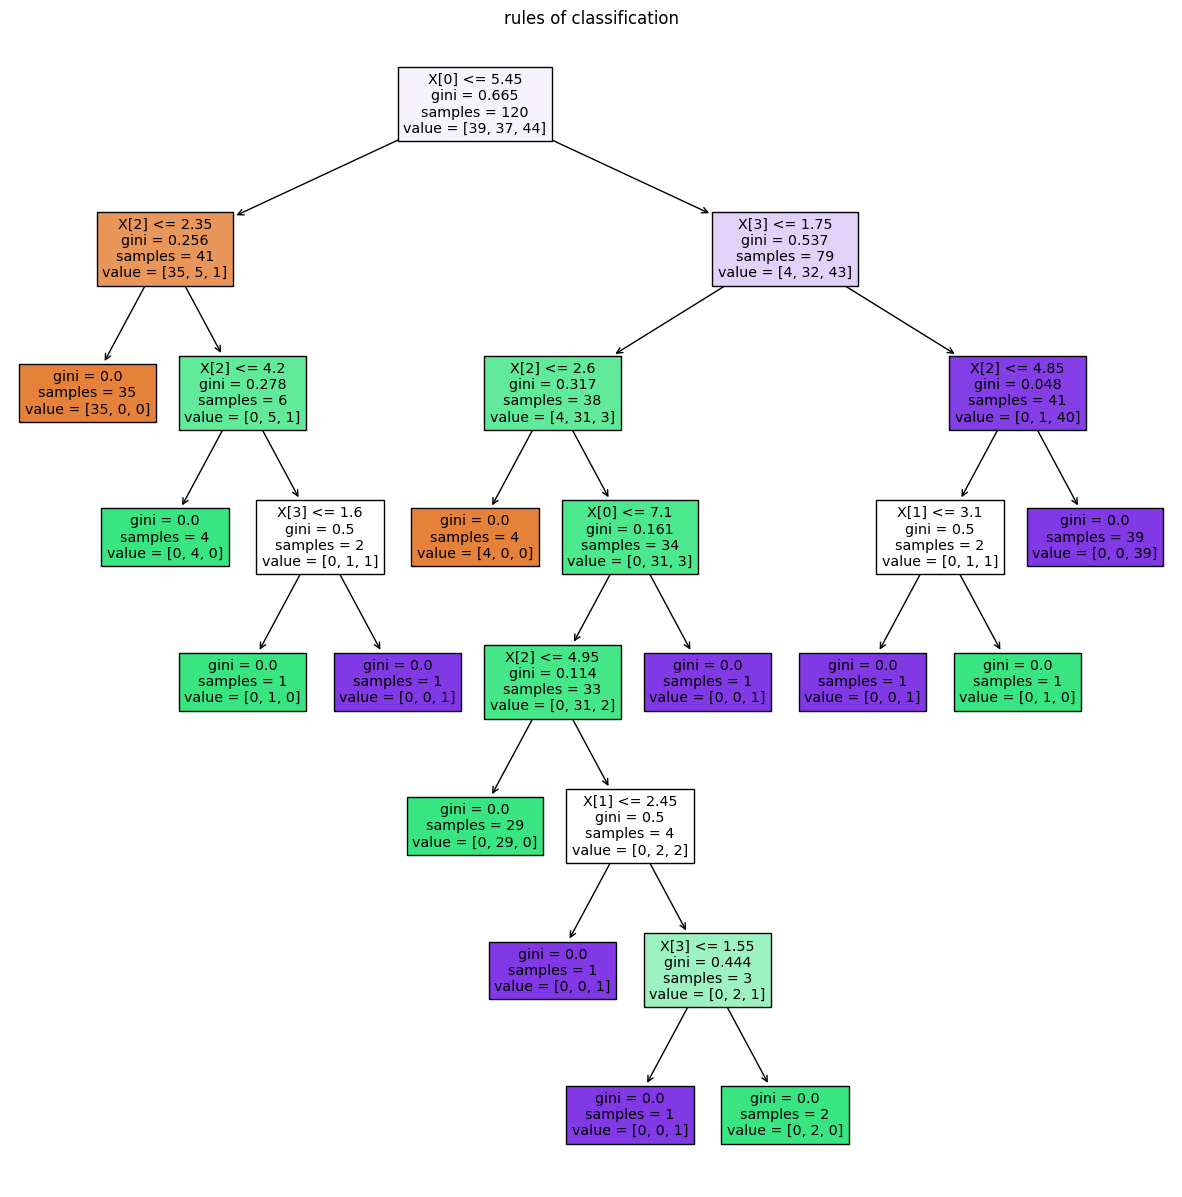

In [4]:
Model = RandomForestClassifier().fit(X1_train, y1_train)

plt.figure(figsize=(15, 15))
estimator = Model.estimators_[5]
estimator.fit(X1_train, y1_train)
plot_tree(estimator, filled=True)
plt.title("rules of classification")
plt.show()

## <font color=#FF0000>**2、树模型评价特征重要性**

### <center>**建模与结果输出**<center>

In [5]:
Model = RandomForestRegressor().fit(X2_train, y2_train)
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]
print (Model.feature_importances_)

[0.04008779 0.00102734 0.00784393 0.00073422 0.02062141 0.39075651
 0.01298392 0.03922273 0.00371986 0.01572424 0.02589288 0.01160581
 0.42977937]


### <center>**数据可视化**<center>

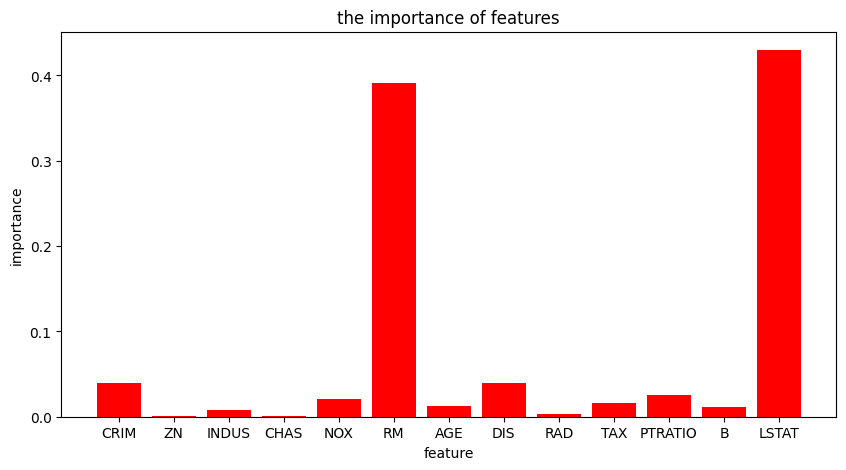

In [6]:
plt.figure(figsize=(10, 5))
plt.title("the importance of features")
plt.xlabel("feature")
plt.ylabel("importance")
plt.bar(names, Model.feature_importances_, color='r')
plt.show()